In [ ]:
import pip
pip.main(['install','tensorflow-gpu'])
pip.main(['install','keras'])
pip.main(['install','h5py'])

In [ ]:
import numpy as np
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
import keras
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import sys
import os

import matplotlib.pyplot as plt
import matplotlib as mpl


def escape():
    sys.exit()

In [23]:
# import_directory = "C:\\Users\\Tamim Mirza\\PycharmProjects\\Project\\Database2\\"
import_directory = "../data/out/"
counter = 0
data_array = np.empty((0, 2))
files = os.listdir(import_directory)
for file in files:
    print('Opening File : ', file)
    data_set = np.load(import_directory+file, allow_pickle=True)
    data_array = np.vstack((data_array, data_set))

#separated = np.array([x for x in data_array if x[1] == 0])

Opening File :  destinationPayload_Monday-WorkingHours.pcap_ISCX.csv.npy
Opening File :  destinationPayload_Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv.npy
Opening File :  destinationPayload_Tuesday-WorkingHours.pcap_ISCX.csv.npy
Opening File :  destinationPayload_Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv.npy
Opening File :  destinationPayload_Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv.npy
Opening File :  destinationPayload_Friday-WorkingHours-Morning.pcap_ISCX.csv.npy
Opening File :  destinationPayload_Wednesday-workingHours.pcap_ISCX.csv.npy
Opening File :  destinationPayload_Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv.npy


In [24]:
#np.random.shuffle(separated)
np.random.shuffle(data_array)
print("ok")

ok


In [25]:
img_row = 50
img_col = 50

N = np.shape(data_array)[0]
train_test_split_percentage = 0.75

X_train = data_array[:int(N * train_test_split_percentage), 0]
X_test = data_array[int(N * train_test_split_percentage):, 0]

X_train = np.array([x.reshape(img_row, img_col, 3) for x in X_train])
X_test = np.array([x.reshape(img_row, img_col, 3) for x in X_test])

ValueError: cannot reshape array of size 2 into shape (50,50,3)

In [26]:
y_train = data_array[:int(N * train_test_split_percentage), 1]
y_test = data_array[int(N * train_test_split_percentage):, 1]


y_train = np.array([[x] for x in y_train])
y_test = np.array([[x] for x in y_test])

In [27]:
model_vgg19_conv = VGG19(include_top=False, weights='imagenet', input_shape=(img_col, img_row, 3))

TypeError: Invalid shape (4,) for image data

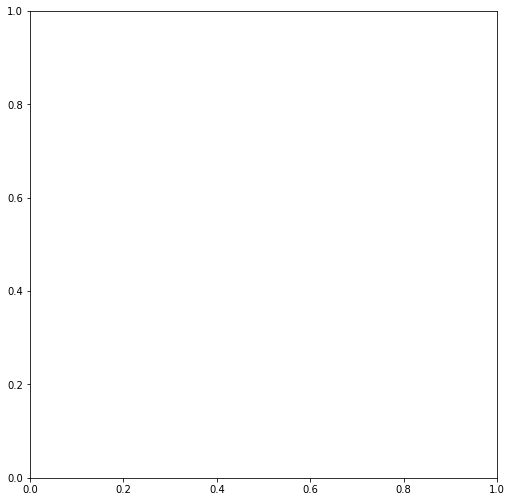

In [28]:
#ploting images for data
%matplotlib inline
n = 40  # how many digits we will display
plt.figure(figsize=(400, 150))
for i in range(6,11):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [30]:
for layer in model_vgg19_conv.layers:
    layer.trainable = False
    print(layer.name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [31]:
x = model_vgg19_conv.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid', name='predictions')(x)

my_model = Model(input=model_vgg19_conv.input, output=x)
my_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`
  


In [32]:
my_model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

batch_size = 32
epochs = 2

From /home/user/.local/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [33]:
hist = my_model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)
score = my_model.evaluate(X_test, y_test, verbose=0)

ValueError: Error when checking input: expected input_2 to have 4 dimensions, but got array with shape (2123057, 1)

In [34]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])


NameError: name 'score' is not defined

In [35]:
training_loss= hist.history['loss']
val_loss= hist.history['val_loss'] 
training_acc= hist.history['acc'] 
val_acc= hist.history['val_acc']
xc=range(epochs)

plt.figure(1,figsize=(7,5)) 
plt.plot(xc,training_loss)
plt.plot(xc,val_loss) 
plt.xlabel('No. of Epochs') 
plt.ylabel('loss') 
plt.title('Training Loss vs Validation Loss') 
plt.grid(True) 
plt.legend(['Train','Val'])

plt.figure(2,figsize=(7,5)) 
plt.plot(xc,training_acc) 
plt.plot(xc,val_acc) 
plt.xlabel('No. of Epochs') 
plt.ylabel('Accuracy') 
plt.title('Training Accuracy vs Validation Accuracy') 
plt.grid(True) 
plt.legend(['Train','Val'],loc=4)

NameError: name 'hist' is not defined

total length =  707686
Anomolies =  139161
Normal =  568525


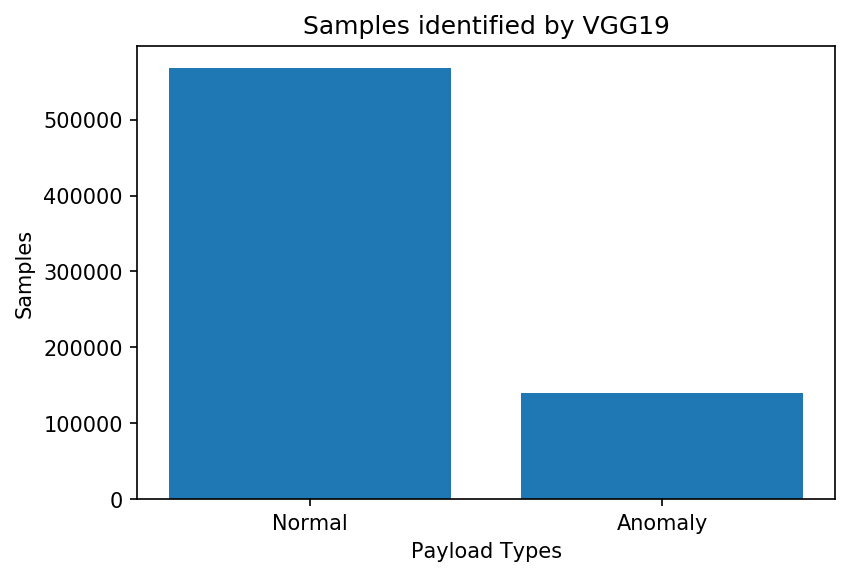

In [36]:
checking_occurences = [x for x in y_test if x == 1]
print("total length = ",len(y_test))
print("Anomolies = ",len(checking_occurences))
print("Normal = ", (len(y_test) - len(checking_occurences)))

n = len(y_test) - len(checking_occurences)
a = len(checking_occurences)

label = ['Normal', 'Anomaly']
samples = [n, a]

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi * 1.5

# this is for plotting purpose
index = np.arange(len(label))
plt.bar(index, samples)
plt.xlabel('Payload Types', fontsize=10)
plt.ylabel('Samples', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=0)
plt.title('Samples identified by VGG19')
plt.show()

In [ ]:
predictions = my_model.predict(X_test)
print("Predictions = ",predictions)

In [ ]:
rounded = [[round(x[0])] for x in predictions]
from sklearn.metrics import f1_score
result = f1_score(y_test,rounded, average=None, labels = [0,1])
print("F1 = ",result)

In [ ]:
result = f1_score(y_test,rounded, average='macro')
print("F1 macro = ",result)

In [ ]:
result = f1_score(y_test,rounded, average='micro')
print("F1 Micro= ",result)

In [ ]:
result = f1_score(y_test,rounded, average='weighted')
print("F1 Weighted= ",result)

In [ ]:
import sklearn.metrics
target_names = ['normal','anomaly']
print(sklearn.metrics.classification_report(y_test,rounded,labels = [0,1], target_names=target_names))

In [37]:
my_model.save("FYP_Finalhd5.hd5")
my_model.save("FYP_Finalh5.h5")

In [ ]:
# from read_activations import get_activations, display_activations
# v_index= 4
# x_valid = X_train[:5]
# a = get_activations(my_model, x_valid[v_index:v_index+1], print_shape_only=True)
# display_activations(a)